- m stands for optimization with model that accepts one parameters (mu)

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from os import listdir
import json
import seaborn as sns
import numpy as np

In [216]:
import cufflinks as cf
cf.go_offline()

In [1]:
%run Pickle_utils.ipynb
# ?pickleUtilss

# Iterative 52 weeks Forecasting

- $mu*f1 + (1-mu)*f2$

- $|mu| < 2$

## functions

## Get all pickle files

- One file for each set of hyperparameters

In [230]:
# list of Pickle files names
path_mu = Path().resolve().parent / 'Pickles'/ 'K_7_52_nw'
list_dir_mu = listdir(path_mu)
files_mu = [ld for ld in list_dir_mu if ld[-2:-1].isdigit()]

In [231]:
# Open Pickles wich contain a dir of dirs 
# dir_parent: contain all runs dictionary. Labeled by date and time
# dir_son: contain a dictionary of one run. labeled by week (1 - 52). 0 contain hyperparameter information.
pkls_mu = pickleUtilss.open_pickle(path_mu, files_mu)

In [232]:
pkls_mu.keys() # dict keys/File names

dict_keys(['08_04_2021_23_56_19', '09_04_2021_01_37_33', '09_04_2021_03_06_44', '09_04_2021_04_42_38', '09_04_2021_06_15_21', '09_04_2021_07_53_06', '09_04_2021_09_36_56', '09_04_2021_11_16_48', '09_04_2021_13_04_58', '09_04_2021_14_52_30', '09_04_2021_16_39_09', '09_04_2021_18_30_47', '09_04_2021_20_17_48', '09_04_2021_22_06_14', '09_04_2021_23_50_54', '10_04_2021_01_36_59', '10_04_2021_03_22_07', '10_04_2021_05_07_34', '10_04_2021_06_53_16', '10_04_2021_08_37_54', '10_04_2021_10_23_15', '10_04_2021_12_06_41', '10_04_2021_13_52_06', '10_04_2021_15_36_15', '10_04_2021_17_21_59', '10_04_2021_23_49_12', '11_04_2021_01_48_24', '11_04_2021_04_01_00', '11_04_2021_06_22_39', '11_04_2021_08_46_37', '11_04_2021_11_01_06', '11_04_2021_13_14_48', '11_04_2021_15_20_19', '11_04_2021_17_34_38', '11_04_2021_19_11_10'])

In [233]:
pkls_mu['08_04_2021_23_56_19'][0]

{'kernel': 'rbf', 'C': 0.5, 'epsilon': 0.01, 'mu': -0.3, 'gamma': 0.02}

In [234]:
# Dataset's last week [1] prediction for hyperparameters on [0]
ma = pkls_mu['08_04_2021_23_56_19'][1].error.mean()*100
pkls_mu['08_04_2021_23_56_19'][1][["real", "predict"]].iplot(title = f"MAPE: {ma:.2f}")

## Joins weeks on each file

In [235]:
# Join each dir_son sequentially by date. Dir labeled by date.
# recives dir of dirs. Returns dir of ordered 52 weeks prediction
jointed_mu = pickleUtilss.join_pickle(pkls_mu)

In [236]:
# hyperparameters values for file
pkls_mu['08_04_2021_23_56_19'][0]

{'kernel': 'rbf', 'C': 0.5, 'epsilon': 0.01, 'mu': -0.3, 'gamma': 0.02}

In [237]:
# Plot specific file real and prediction
mape_mu = jointed_mu['08_04_2021_23_56_19'].error.mean()*100
jointed_mu['08_04_2021_23_56_19'][["real", "predict"]].iplot(title = f"MAPE: {mape_mu:.2f}")

## Plot specific predictions vs real

In [238]:
# concatenate real value and prediction for all runs.
# argument: dir of jointed dataframes. returns real values and all predictions 
lok_mu = pickleUtilss.concat_pred(jointed_mu)

In [239]:
lok_mu.iplot() # double click on name to plot single plots

## Plot specific error

In [240]:
# concatenate real value and prediction for all runs.
# argument: dir of jointed dataframes. 
# return: error given by abs((y - pred)/y)
error_totmu = pickleUtilss.concat_error(jointed_mu)

In [241]:
error_totmu.mean()*100

08_04_2021_23_56_19    2.508360
09_04_2021_01_37_33    2.817411
09_04_2021_03_06_44    3.147880
09_04_2021_04_42_38    2.336533
09_04_2021_06_15_21    2.642908
09_04_2021_07_53_06    4.692162
09_04_2021_09_36_56    2.298305
09_04_2021_11_16_48    3.152091
09_04_2021_13_04_58    2.941403
09_04_2021_14_52_30    2.401318
09_04_2021_16_39_09    3.802310
09_04_2021_18_30_47    2.334306
09_04_2021_20_17_48    3.341875
09_04_2021_22_06_14    2.145030
09_04_2021_23_50_54    2.504671
10_04_2021_01_36_59    2.454342
10_04_2021_03_22_07    2.454210
10_04_2021_05_07_34    2.478698
10_04_2021_06_53_16    2.132819
10_04_2021_08_37_54    2.301882
10_04_2021_10_23_15    3.793664
10_04_2021_12_06_41    2.454233
10_04_2021_13_52_06    2.115669
10_04_2021_15_36_15    2.271649
10_04_2021_17_21_59    2.188232
10_04_2021_23_49_12    2.702375
11_04_2021_01_48_24    2.686154
11_04_2021_04_01_00    2.619556
11_04_2021_06_22_39    2.499731
11_04_2021_08_46_37    2.611551
11_04_2021_11_01_06    8.933471
11_04_20

In [242]:
error_totmu.iplot()

#  Target against paramter new mu

In [1]:
import plotly.express as px

In [70]:
def create_dataframe_scaled(data, scale):
    itera = range(len(data))
    #hyperparameters
    hyper = [[*data[i]['params'].values()] for i in itera]
    df = pd.DataFrame(hyper, columns = [*data[0]['params'].keys()])
    # target
    df["target"] = [-data[i]['target']*scale for i in itera]
    # datetime
    df["datetime"] = [data[i]['datetime']['datetime'] for i in itera]
    return df

In [73]:
path_json_mu = Path().resolve().parent / 'Logs' / 'log_52weeks_new_w.json'

In [74]:
# read data in json file containing target and hyperparameters
data_mu = []
for line in open(path_json_mu, 'r'):
    data_mu.append(json.loads(line))

In [75]:
# creates dataframe with scaled target (for corrections)
df_mu = create_dataframe_scaled(data = data_mu, scale = 1)

## Plot

In [76]:
df_mu.columns

Index(['C', 'epsilon', 'gamma', 'mu', 'target', 'datetime'], dtype='object')

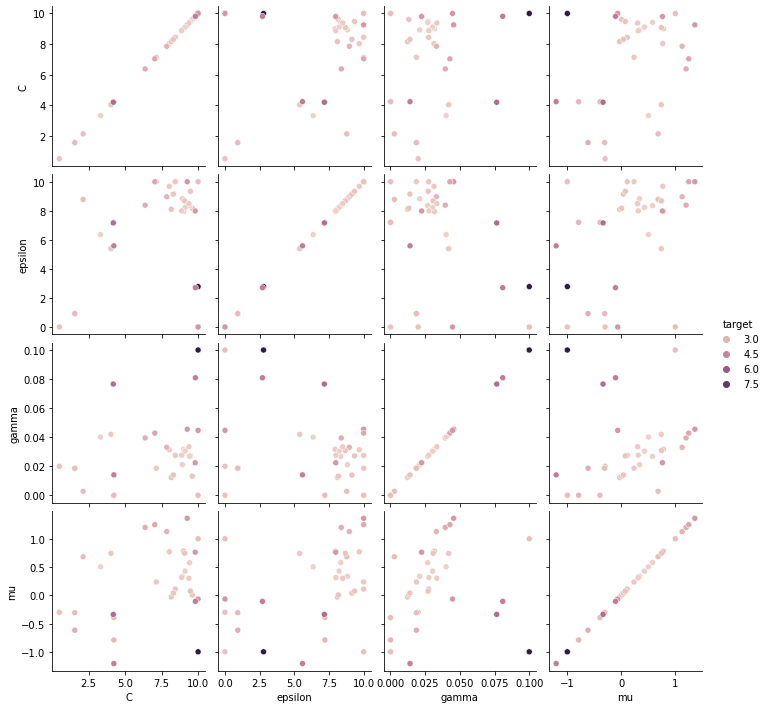

In [77]:
sns.pairplot(data = df_mu, hue = "target", kind = "scatter", diag_kind = None);

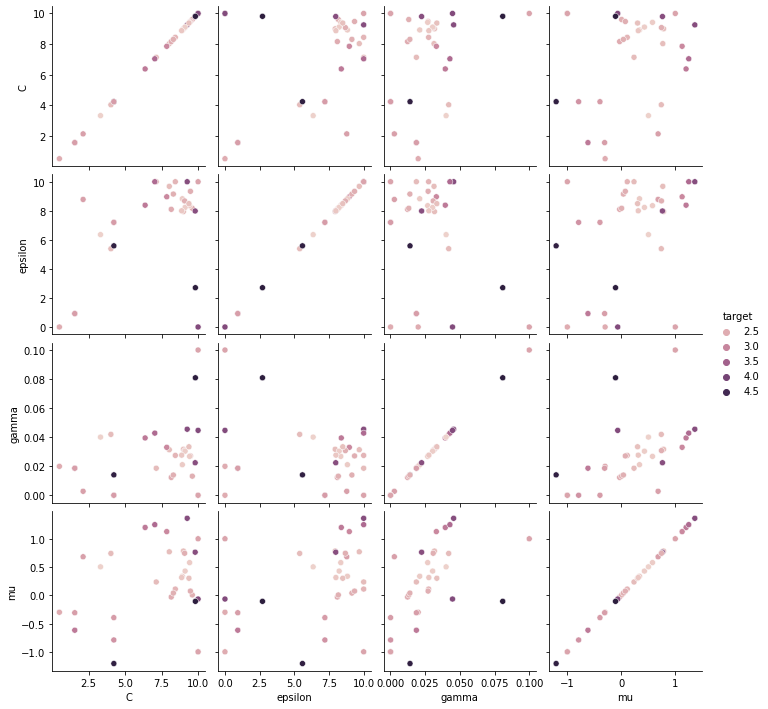

In [80]:
sns.pairplot(data = df_mu.drop([30, 32]), hue = "target", kind = "scatter", diag_kind = None);

In [162]:
px.scatter_matrix(df_mu.drop(["datetime"], axis = 1), color="target")

<AxesSubplot:xlabel='C', ylabel='epsilon'>

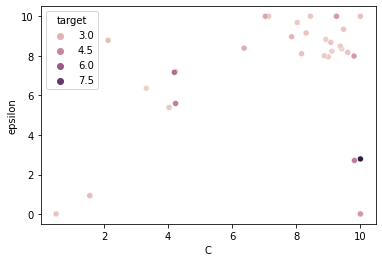

In [163]:
sns.scatterplot(x = df_mu.C, y = df_mu.epsilon, hue = df_mu.target)